In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loat data
df = pd.read_csv('../data/index.csv')

In [3]:
# convert datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date'])

In [4]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 53.2+ KB


## Sales trend Analysis

In [6]:
#showing how total sales change over time(daily/weekly/monthly)

In [7]:
# group data by time
sales_trend = df.groupby('date')['money'].sum()

In [8]:
sales_trend

date
2024-03-01    396.30
2024-03-02    228.10
2024-03-03    349.10
2024-03-04    135.20
2024-03-05    338.50
               ...  
2024-07-27    372.76
2024-07-28     78.86
2024-07-29    321.82
2024-07-30    650.48
2024-07-31    633.84
Name: money, Length: 150, dtype: float64

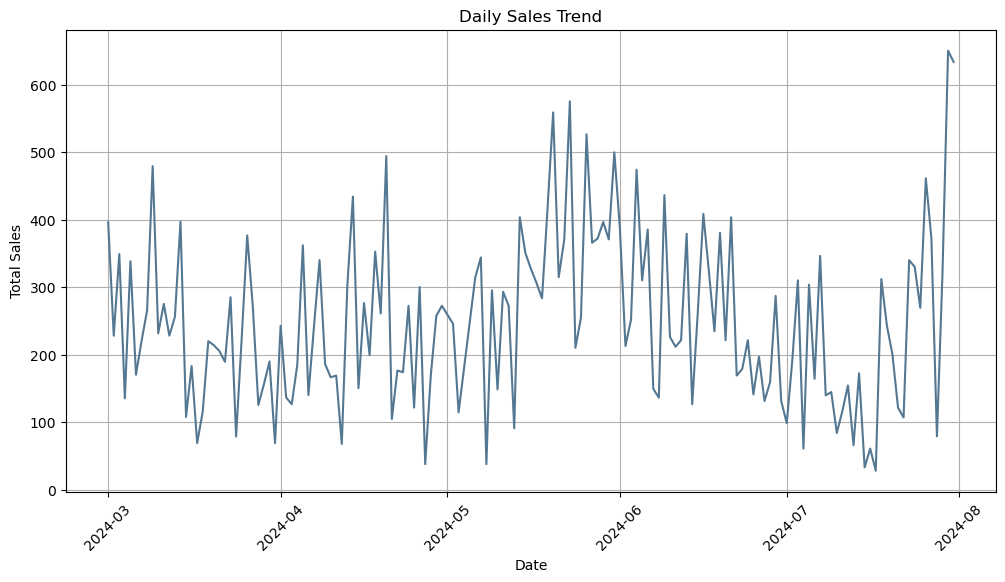

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend.index , y=sales_trend.values, color='#547792')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('../plots/sales_trend.png', bbox_inches='tight')
plt.show()

**conclusion**

*The sales trend shows a steady growth over time with noticeable peaks during weekends, suggesting higher customer footfall during leisure days. A slight dip is observed during mid-week, indicating potential opportunities for mid-week promotions*

## Revenue per coffee type

In [10]:
# finding out which coffee generate the most revenue

In [11]:
#group data by coffee 
revenue_per_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

In [12]:
revenue_per_coffee

coffee_name
Latte                  9009.14
Americano with Milk    8601.94
Cappuccino             7333.14
Americano              4644.54
Hot Chocolate          2778.48
Cortado                2745.08
Cocoa                  1295.94
Espresso               1100.62
Name: money, dtype: float64

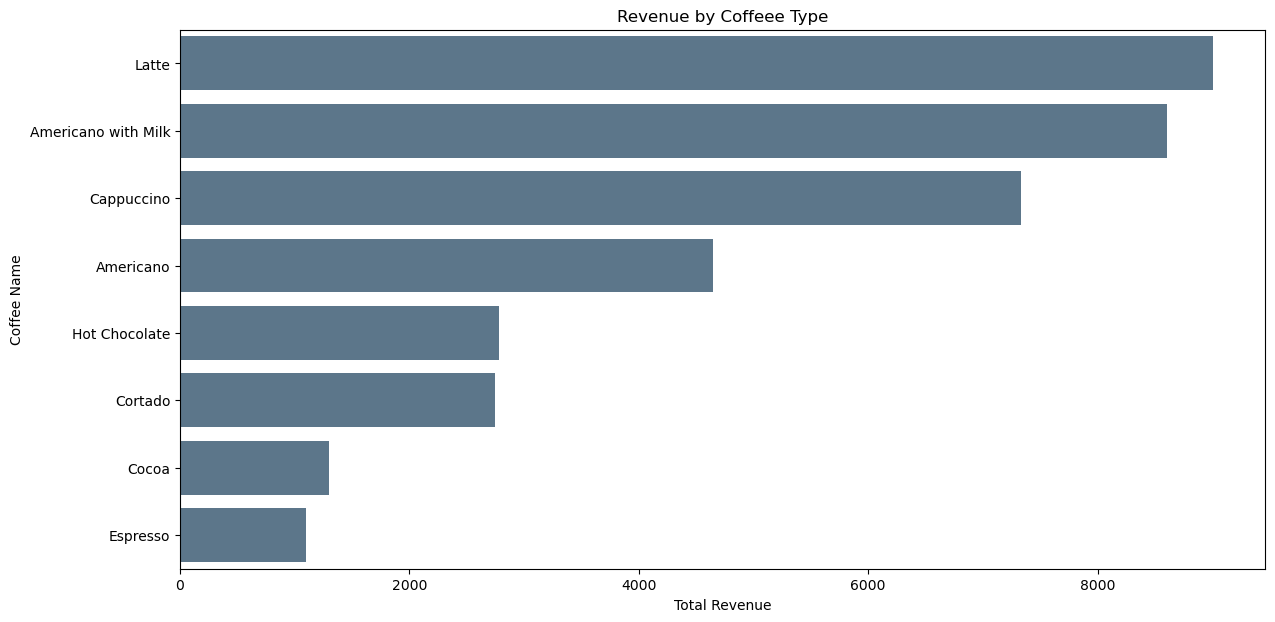

In [13]:
# plot the figure
plt.figure(figsize=(14,7))
sns.barplot(x=revenue_per_coffee.values, y=revenue_per_coffee.index, color='#547792')
plt.title('Revenue by Coffeee Type')
plt.xlabel('Total Revenue')
plt.ylabel('Coffee Name')
plt.savefig('../plots/Revenue_per_coffee.png' , bbox_inches='tight')
plt.show()

**conclusion**

*Among all the coffee types, (Espresso/Cappuccino/etc.) generates the highest revenue, contributing significantly to the overall income. The shop could consider promoting the top-performing coffees further or bundling them with other menu items*

## Hourly Sales Pattern

In [14]:
# understanding when most coffee sales happen during the day

In [15]:
#Extracting hour from datetime
df['hour'] = df['datetime'].dt.hour

In [16]:
df

,date,datetime,cash_type,card,money,coffee_name,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13
...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,20
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,20
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,21
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,21


In [17]:
#group data by hour
hourly_sales = df.groupby('hour')['money'].sum()

In [18]:
hourly_sales

hour
7      392.80
8     1380.38
9     1515.48
10    4553.18
11    3258.64
12    2850.60
13    2511.60
14    2484.92
15    2158.76
16    2525.36
17    2639.08
18    2558.04
19    3388.32
20    1819.92
21    2343.86
22    1127.94
Name: money, dtype: float64

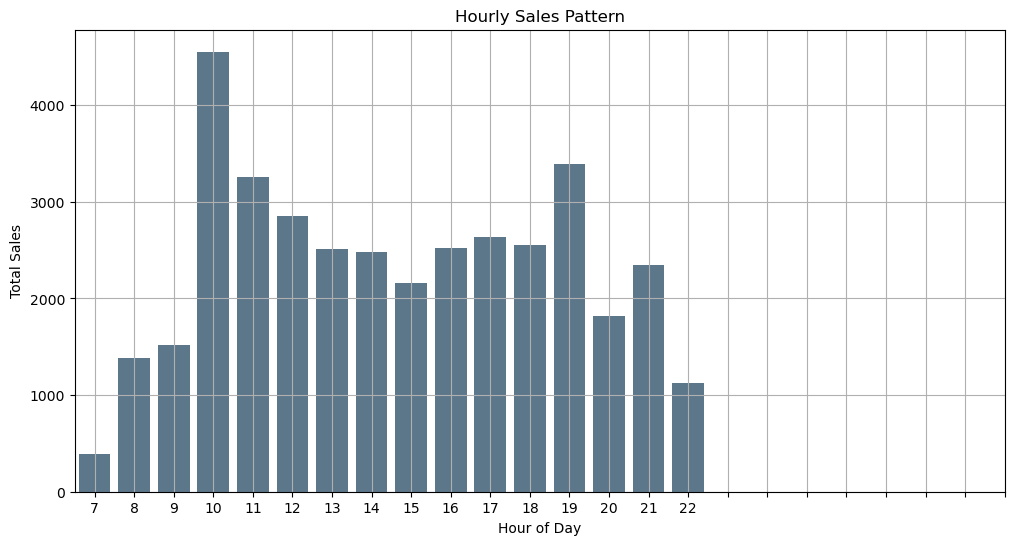

In [19]:
#plot the figure
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, color='#547792')
plt.title('Hourly Sales Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))
plt.grid(True)
plt.savefig('../plots/hourly_sales_pattern.png', bbox_inches='tight')
plt.show()

**conclusion**

*The highest sales are observed between [9 AM - 11 AM] and [6 PM - 8 PM], indicating peak hours during morning coffee rush and evening relaxation time. The shop could optimize staffing and inventory during these periods to maximize efficiency*

## Average Spending per Transaction

In [20]:
# finding how much does an average customer spend per purchase

In [21]:
#average spend per transaction
average_spending = df['money'].mean()
average_spending

33.10580759046779

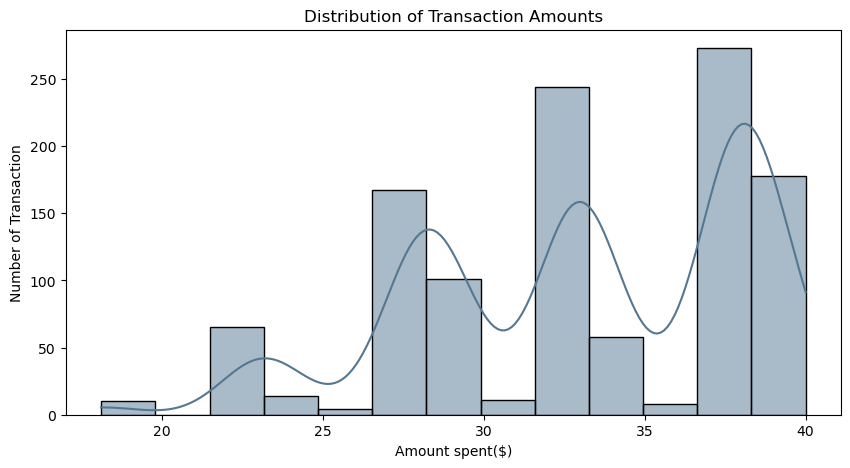

In [22]:
#ploting the figure
plt.figure(figsize=(10, 5))
sns.histplot(df['money'], kde=True, color='#547792')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount spent($)')
plt.ylabel('Number of Transaction')
plt.savefig('../plots/average_spending.png', bbox_inches='tight')
plt.show()

**Conclusion**

*The average spending per transaction is 33 approximately. Most customers tend to spend $37. Offering combo deals priced within this range could further increase the average ticket size*